
## Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

### Mentoria Diplomatura en Ciencia de Datos 2020
### "Detección del desarrollo del cultivo con imágenes de Drones"

### Descripción del dataset

El dataset presentado contiene informacion sobre etapas fenológicas de un cultivo y rendimientos provenientes de ensayos experimentales de INTA.La información se encuentra bajo estandares de secreto estadístico, están anonimizadas las variedades del cultivo y también poseen simulación de datos sensibles. La informacion se encuentra en una única tabla compilada, la documentacion especificando la estructura y formato de los datos se encuentra en la carpeta 'Docs'.

### 1 Lectura de Datos

In [15]:
import io
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import datetime

In [16]:
#Cargamos los datos de las imágenes ya procesadas de drones
#df = pd.read_csv('./uav.csv',decimal=",",sep=";")
df = pd.read_csv('./Dron1.csv',decimal=".",sep=",")


C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
#Previsualización de datos
df.head(5)

,Longitude,Latitude,Conjunto de datos,ID,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,...,dias entre fechas,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
0,-2.057.297.803.054.350,-2.120.827.812.446.900,1er Siembra,12203,CL,Variedad_J,1,1,5.4,1,...,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
1,-2.057.297.676.715.260,-2.120.827.773.572.710,1er Siembra,12204,CL,Variedad_J,1,1,5.4,1,...,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
2,-2.057.297.550.375.270,-2.120.827.734.699.420,1er Siembra,12205,CL,Variedad_J,1,1,5.4,1,...,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
3,-2.057.297.971.508.270,-2.120.827.735.509.350,1er Siembra,12206,CL,Variedad_J,1,1,5.4,1,...,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
4,-2.057.297.845.168.280,-2.120.827.696.635.160,1er Siembra,12207,CL,Variedad_J,1,1,5.4,1,...,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567


### 2 Análisis general del dataset

In [18]:
# Observamos las dimensiones del dataset
df.shape

(38920, 45)

In [19]:
# Listado de columnas
df.columns

Index(['Longitude', 'Latitude', 'Conjunto de datos', 'ID ', 'Ciclos',
       'Variedad', 'Rep', 'Parcela', 'ZADOCK', 'fila', 'columna', 'Azul',
       'Verde', 'Rojo', 'Borde rojo', 'Infra Rojo', 'NDVI', 'NDRE', 'SAVI',
       'SCCI', 'GNDVI', 'GVI', 'RVI', 'RedEdgeVI', 'LNVI', 'GRVI', 'MGRVI',
       'NGRVI', 'Roya (%)', 'Manchas Foliares', 'Fusariosis', 'Carbon (%)',
       'Adversidades', 'Fecha de espigaz?', 'Fecha de madurez',
       'dias entre fechas', 'Vuelco', 'Altura', 'Aspecto ', 'Peso hecto',
       'Peso de 1000 granos', 'p grano', 'hum', 'PAJUST', 'RDTO'],
      dtype='object')

 la variable ZADOKS indica el momento fenológico para cada variedad y es una target que se desea predecir, también lo es rendimiento

#### SELECCIÓN DE VARIABLES

In [20]:
# Obtenemos los tipos de datos por columnas
data_types = df.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
Longitude,object
Latitude,object
Conjunto de datos,object
ID,int64
Ciclos,object
Variedad,object
Rep,int64
Parcela,int64
ZADOCK,float64


Se observan que hay varias variables que no se corresponden con el tipo de dato.
- Parcela es un identificador categórico y se lo interpreta como un número, lo mismo ocurre con fila, columna, repetición.
- Algunos índices de vegetación, están representados como texto y no como números. 




In [21]:
# Convertimos los identificadores del diseño experimental a strings
df['Parcela'] = df.Parcela.astype(str)
df['Rep'] = df.Rep.astype(str)
df['columna'] = df.columna.astype(str)
df['fila'] = df.fila.astype(str)



#### ANALISIS DESCRIPTIVO ESTADÍSTICO

In [22]:
cat_feature = df.columns[df.dtypes == 'object']
num_feature = df.columns[df.dtypes != 'object']

In [23]:
# Descripcion Variables Numericas
df[num_feature].describe().T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,38920.0,10768.725128,5885.805911,1.0000,5783.750000,10653.50000,15599.2500,22613.0000
ZADOCK,38920.0,5.776295,0.811692,3.9000,5.400000,5.90000,6.5000,6.9000
Azul,38920.0,54136.002055,6738.960154,35300.0000,49600.000000,54200.00000,58400.0000,83800.0000
Verde,38920.0,18604.489979,19970.612059,10000.0000,12090.000000,13430.00000,14870.0000,99900.0000
Rojo,38920.0,55272.557554,14307.772507,10000.0000,46500.000000,55100.00000,63500.0000,99900.0000
Borde rojo,38920.0,35321.392857,6606.948615,12500.0000,30560.000000,35230.00000,39860.0000,55230.0000
Infra Rojo,38920.0,17004.025180,3031.438494,10000.0000,14998.000000,17139.00000,19165.0000,66870.0000
NDVI,38920.0,-0.512690,0.118843,-0.8157,-0.573700,-0.51940,-0.4698,0.4266
NDRE,38920.0,-0.347983,0.054897,-0.6342,-0.379400,-0.34540,-0.3148,0.6661
SAVI,38920.0,-0.769030,0.178264,-1.2235,-0.860500,-0.77910,-0.7047,0.6399


In [24]:
# Descripcion Variables Categoricas
df[cat_feature].describe().T
df.describe(include='O').T

,count,unique,top,freq
Longitude,38920,32911,-2.057.279.414.946.900,3
Latitude,38920,38017,-2.120.836.731.549.670,2
Conjunto de datos,38920,2,1er Siembra,20343
Ciclos,38920,2,CC,20383
Variedad,38920,23,Variedad_K,3289
Rep,38920,3,3,13516
Parcela,38920,144,30,378
fila,38920,3,3,13222
columna,38920,48,11,1041
Manchas Foliares,38920,5,cero,36586


In [25]:
#Observamos la cantidad de valores por cada categoría para una determinada variable
df.Variedad.value_counts()

Variedad_K     3289
Variedad_T     3279
Variedad_Q     3136
Variedad_A     1793
Variedad_E     1739
Variedad_N     1719
Variedad_P     1695
Variedad_L     1679
Variedad_G     1675
Variedad_B     1669
Variedad_C     1668
Variedad_F     1623
Variedad_J     1608
Variedad_H     1600
Variedad_S     1582
Variedad_D     1575
Variedad_M     1497
Variedad_O     1415
Variedad_I     1409
Variedad_R      914
Variedad_R      809
Variedad_U      792
Variedad_U      755
Name: Variedad, dtype: int64

En la columna unique podemos ver la cantidad de valores diferentes que toma la variable, esto se denomina 'cardinalidad'. Si esta es muy cercana la cantidad de datos indica que practicamente cada entrada posee un valor diferente, por ejemplo podria ser un caso de un ID. Si la cardinalidad es 1 significa que todos los valores de la variable son el mismo, por lo cual la variable no brinda ninguna informacion. Otro caso que se puede presentar es que la cardinalidad sea 2 en este caso es similar a una variable binaria.

### 3 Distribuciones Estadísticas

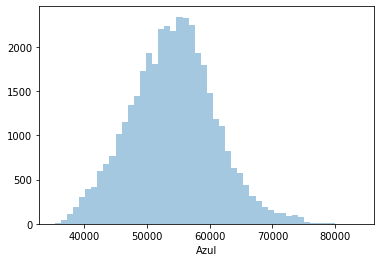

In [28]:
# Distribucion de la banda expectral Azul 
sns.distplot(df.Azul, kde=False)

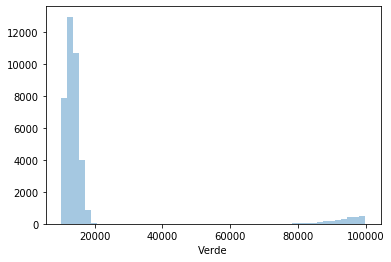

In [29]:
# Distribucion de la banda espectral Verde
sns.distplot(df.Verde, kde=False)

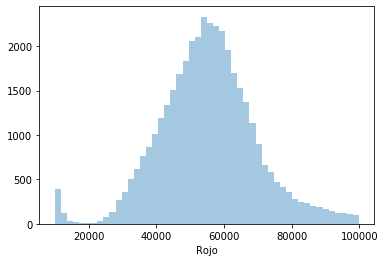

In [30]:
# Distribucion de la banda expectral Rojo
sns.distplot(df.Rojo, kde=False)